### Time Series on Company Stock and Investment

In [1]:
import pandas as pd
df=pd.read_csv("Company Stock and Investment.csv")

In [2]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
df.shape

(1984, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
Date                       1984 non-null object
Oil Investments            1984 non-null float64
Gold Investments           1984 non-null float64
Comp Stock                 1984 non-null float64
Other sharesInvestments    1984 non-null float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.isnull().sum()
# There are no null data

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


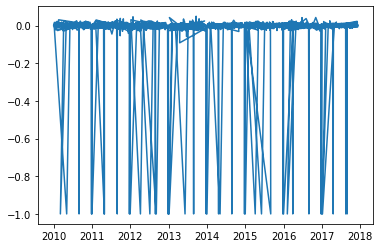

In [9]:
plt.plot(df['Date'], df['Gold Investments'])

From plots we are not able to understand the trend of the data clearly as it is date wise. We will have to group it yearly wise to understand trend

##### Creating a separate dataframe for gold

##### Gold stock analysis

In [10]:
df_gold=df[['Date','Gold Investments']]
df_gold=df_gold.reset_index(drop=True)
df_gold

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221
...,...,...
1979,2017-09-11,0.000623
1980,2017-10-11,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621


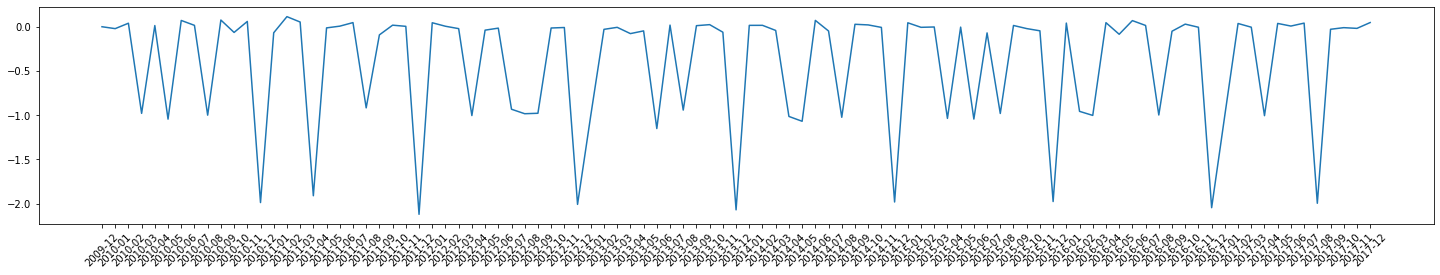

In [11]:
gold_group=df_gold.groupby(df_gold['Date'].dt.strftime('%Y-%m'))['Gold Investments'].sum()

gold_group
plt.figure(figsize=(25,4))
plt.plot(gold_group)

plt.tick_params(axis='x',rotation=45)

#### Observations:
1. The gold stock price variation seems seasonal 

##### Checking the stationarity of the data
We need to check the stationarity of the data by visual method of rolling mean and rolling standard deviation and by Dickey Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

##### Checking stationarity of the gold group

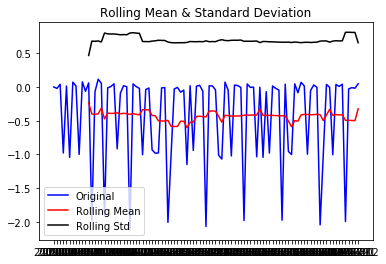

Results of Dickey-Fuller Test:
Test Statistic                 -3.933355
p-value                         0.001803
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [13]:
test_stationarity(gold_group)

##### observations for the above
1. Rolling mean and rolling standard deviation seems less varying
2. p value is less than 0.5, hence we reject the null hypothesis and conclude that the dataset is stationary

##### Finding out the p,q,d value using acf and pacf graphs

In [14]:
gold_group=pd.DataFrame(gold_group)
#.reset_index(inplace=True)
gold_group.reset_index(inplace=True)
gold_group

,Date,Gold Investments
0,2009-12,0.000150
1,2010-01,-0.021293
2,2010-02,0.039871
3,2010-03,-0.979387
4,2010-04,0.013550
...,...,...
92,2017-08,-1.996136
93,2017-09,-0.028615
94,2017-10,-0.010211
95,2017-11,-0.018359


In [17]:
import statsmodels
import statsmodels.api as sm 

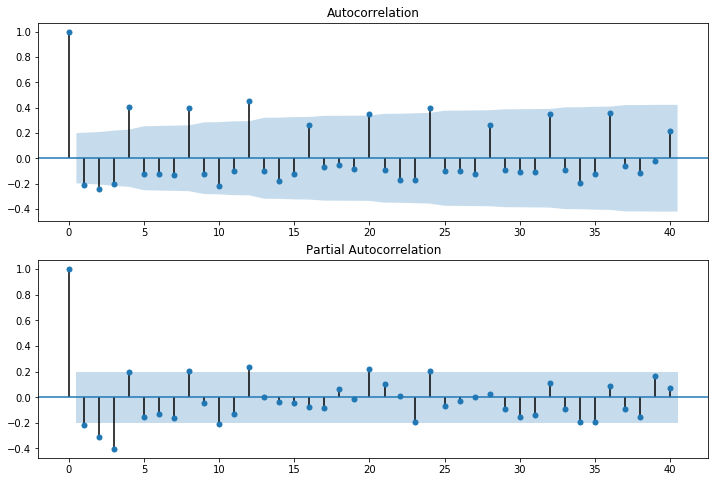

In [18]:

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(gold_group['Gold Investments'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(gold_group['Gold Investments'],lags=40,ax=ax2)

In [19]:
model=sm.tsa.statespace.SARIMAX(gold_group['Gold Investments'],order=(1,0,1),seasonal_order=(1,0,1,12)) # this order is p, d and q
model_fit=model.fit()
model_fit.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                   Gold Investments   No. Observations:                   97
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 -80.879
Date:                            Thu, 22 Oct 2020   AIC                            171.757
Time:                                    16:36:02   BIC                            184.631
Sample:                                         0   HQIC                           176.962
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.119      8.369      0.000       0.764       1.232
ma.L1         -0.9936      0.247     -4.024      0.000      -1.478      -0.510
ar.S.L12       0.9969      0.071     13.995      0.000       0.857       1.137
ma.S.L12      -0.9293      0.797     -1.166      0.244      -2.491       0.633
sigma2         0.2492      0.168      1.485      0.138      -0.080       0.578
===================================================================================
Ljung-Box (Q):                       21.55   Jarque-Bera (JB):                16.69
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.66
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
results=model.fit()

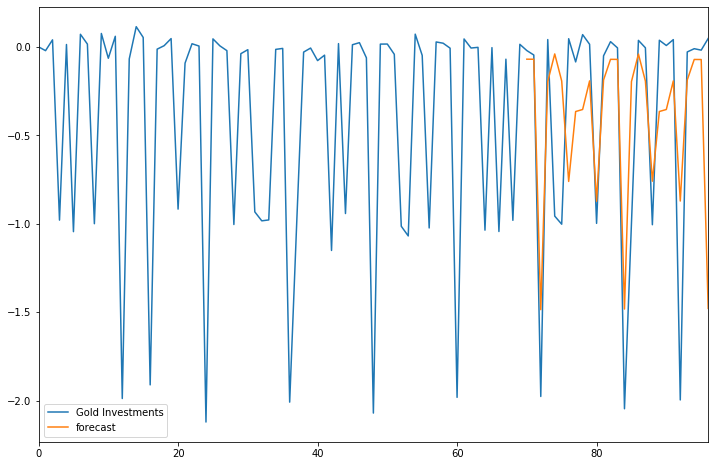

In [21]:
gold_group['forecast']=model_fit.predict(start=70,end=97,dynamic=True)

gold_group[['Gold Investments','forecast']].plot(figsize=(12,8))

In [22]:
# creating some data to predict future of this
from pandas.tseries.offsets import DateOffset



In [23]:
gold_group['Date']=pd.to_datetime(gold_group['Date'])

In [24]:
future_dates=[gold_group.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]

In [25]:
future_dates_df=pd.DataFrame(index=future_dates[1:])#,columns=gold_group.columns)

In [26]:
future_dates_df.reset_index(inplace=True)
future_dates_df.rename(columns={'index':'Date'},inplace=True)
future_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [27]:
from datetime import datetime

In [28]:
future_dates_df['Date']=future_dates_df['Date'].dt.strftime('%m-%Y')

In [29]:
future_df=pd.concat([gold_group,future_dates_df])


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


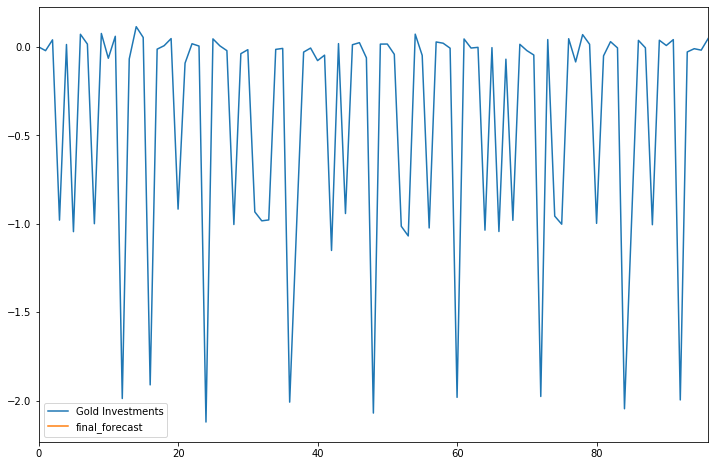

In [30]:
future_df['final_forecast']=model_fit.predict(start=98,end=133)
future_df[['Gold Investments','final_forecast']].plot(figsize=(12,8))

In [31]:
future_df

,Date,Gold Investments,forecast,final_forecast
0,2009-12-01 00:00:00,0.000150,NaN,NaN
1,2010-01-01 00:00:00,-0.021293,NaN,NaN
2,2010-02-01 00:00:00,0.039871,NaN,NaN
3,2010-03-01 00:00:00,-0.979387,NaN,NaN
4,2010-04-01 00:00:00,0.013550,NaN,NaN
...,...,...,...,...
31,08-2020,NaN,NaN,NaN
32,09-2020,NaN,NaN,NaN
33,10-2020,NaN,NaN,NaN
34,11-2020,NaN,NaN,NaN


In [195]:
future_df.dtypes

Date                 object
Gold Investments    float64
forecast            float64
final_forecast      float64
dtype: object